In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
%matplotlib inline

In [2]:
# Datafile Description

# The datafile was created from data obtained from a number of hospitals including Cleveland Clinic foundation. The database
# contains 76 attributes and 303 instances. This project is a subset of the full dataset containing only 14 attributes.
 
# Attribute Information:

#      1. (age)       age in years
#      2. (sex)       sex (1 = male; 0 = female)
#      3. (cp)        cp: chest pain type
#                     -- Value 1: typical angina
#                     -- Value 2: atypical angina
#                     -- Value 3: non-anginal pain
#                     -- Value 4: asymptomatic
      
#      4. (trestbps)  trestbps: resting blood pressure (in mm Hg on admission to the hospital)
#      5. (chol)      chol: serum cholestoral in mg/dl
#      6. (fbs)       (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
#      7. (restecg)   restecg: resting electrocardiographic results
#                     -- Value 0: normal
#                     -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
#                     -- Value 2: showing probable or definite left ventricular hypertrophyby Estes' criteria
#      8. (thalach)   thalach: maximum heart rate achieved
#      9. (exang)     exang: exercise induced angina (1 = yes; 0 = no)
#     10. (oldpeak)   oldpeak = ST depression induced by exercise relative to rest 
#     11. (slope)     slope: the slope of the peak exercise ST segment
#                     -- Value 1: upsloping
#                     -- Value 2: flat
#                     -- Value 3: downsloping 
#      12. (ca)       ca: number of major vessels (0-3) colored by flourosopy 
#      13. (thal)     thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 
#      14. (target)   the predicted attribute

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


C:\Users\mehed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mehed\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\mehed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


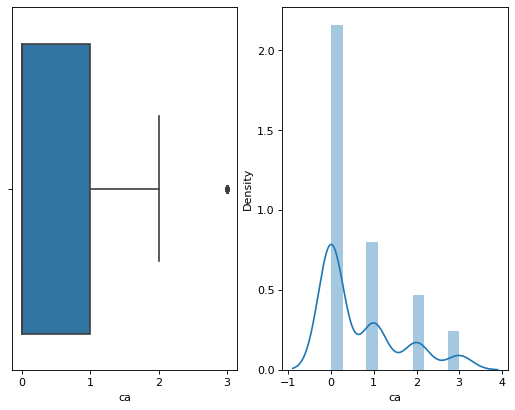

C:\Users\mehed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mehed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


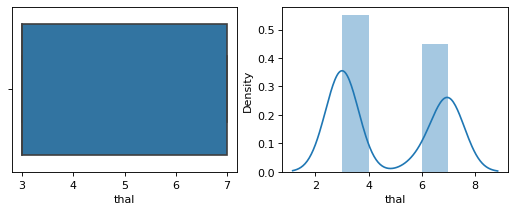

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,1
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,1
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [3]:
filepath = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
df = pd.read_csv(filepath,names = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak",
                                  "slope","ca","thal","target"], na_values= ['?','n/a', 'na', '--'])

# test to see if there is amy missing values
print (df.isnull().sum())

plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(1,2,1)
# Box plot
sns.boxplot(df.ca, orient='v')

#
# Distribution plot
plt.subplot(1,2,2)
sns.distplot(df.ca)
plt.show()
#
plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(2,2,1)
# Box plot
sns.boxplot(df.thal)
#
# Distribution plot
plt.subplot(2,2,2)
sns.distplot(df.thal)
plt.show()
#
df['ca']=df['ca'].fillna(0)
df['thal']=df['thal'].fillna(3)
# pd.set_option('display.max_rows', df.shape[0]+1)
df['target'] = np.where(df['target'] >= 1, 1, df['target'])
df.head(10)

In [4]:
df.median()

age          56.0
sex           1.0
cp            3.0
trestbps    130.0
chol        241.0
fbs           0.0
restecg       1.0
thalach     153.0
exang         0.0
oldpeak       0.8
slope         2.0
ca            0.0
thal          3.0
target        0.0
dtype: float64

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df['target'].value_counts()

0    164
1    139
Name: target, dtype: int64

C:\Users\mehed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

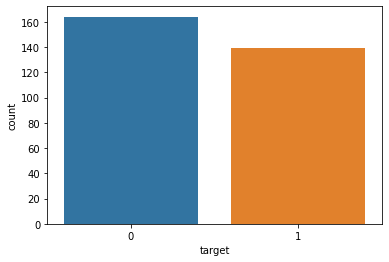

In [9]:
sns.countplot(df['target'])

<AxesSubplot:>

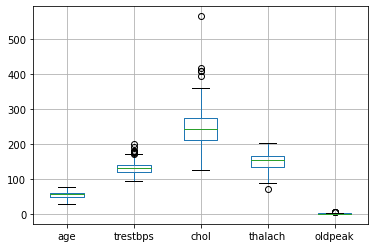

In [10]:
# outlier Detection
df1 = pd.DataFrame(data = df, columns = ['age','trestbps','chol','thalach', 'oldpeak'])
df1.boxplot()

<AxesSubplot:>

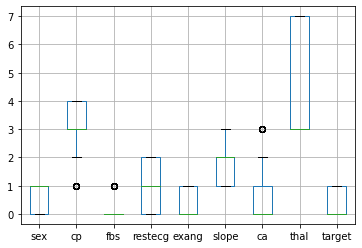

In [11]:
df2 = pd.DataFrame(data = df, columns = ['sex','cp','fbs','restecg','exang','slope','ca','thal','target'])
df2.boxplot()

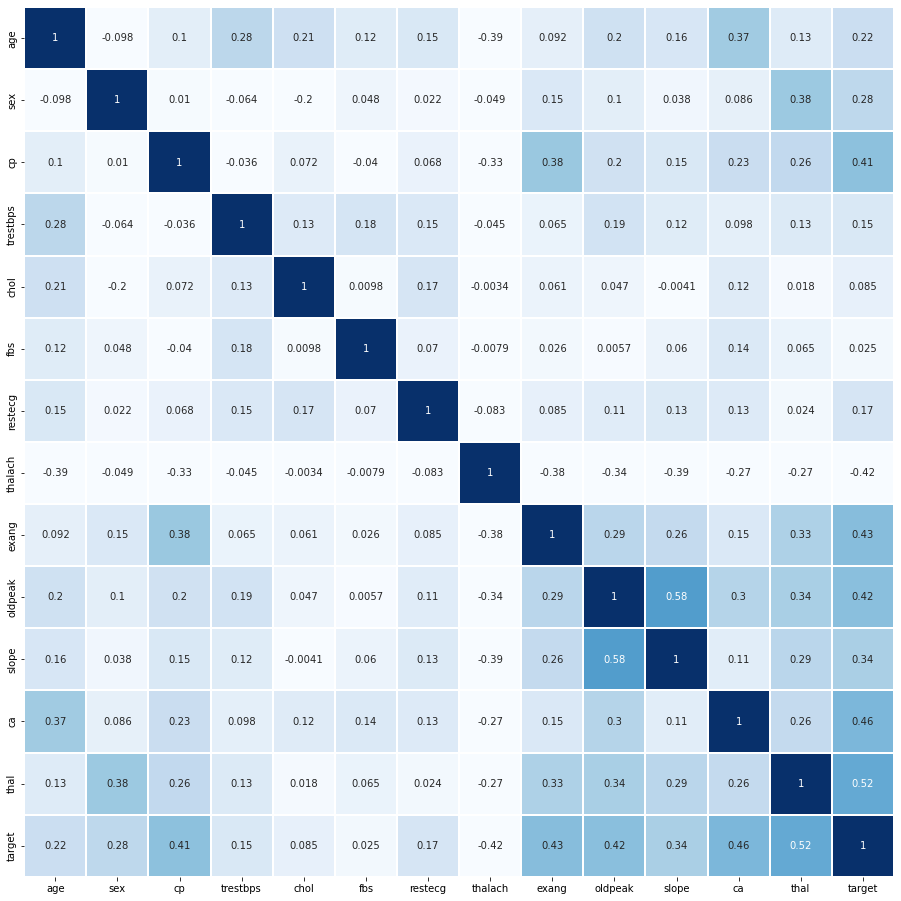

In [12]:
corr = df.corr()
plt.subplots(figsize=(20,16))
# sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns)
sns.heatmap(corr, cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues', annot=True)
plt.show()

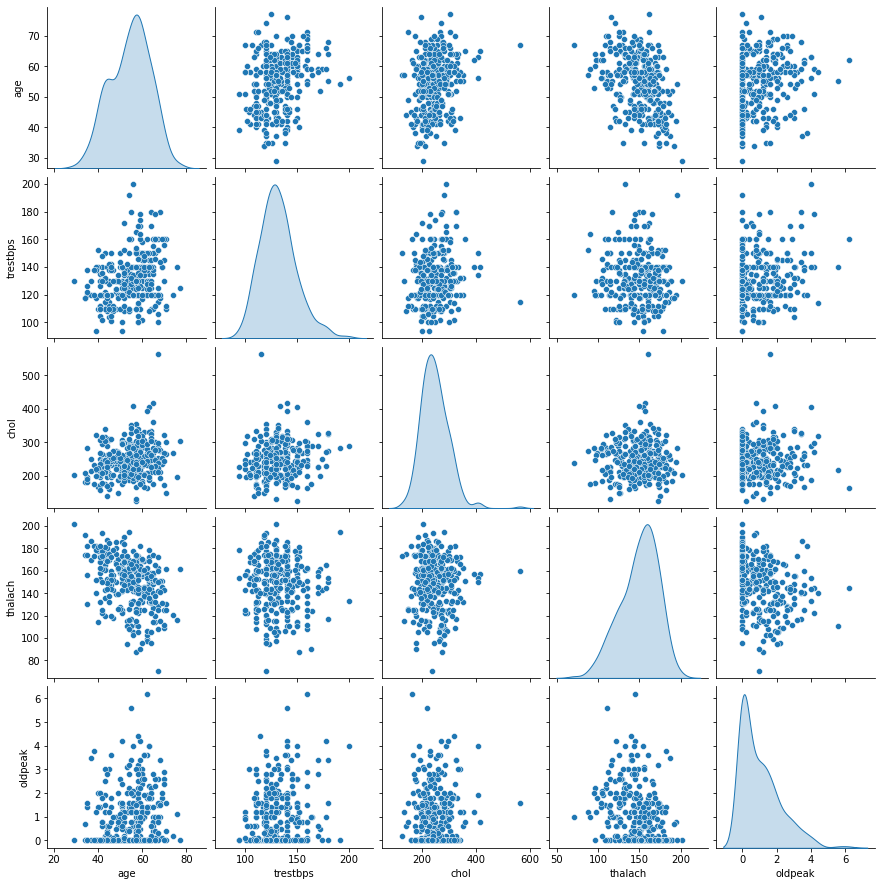

In [13]:
sns.pairplot(df, diag_kind="kde", vars=['age','trestbps','chol','thalach','oldpeak'])

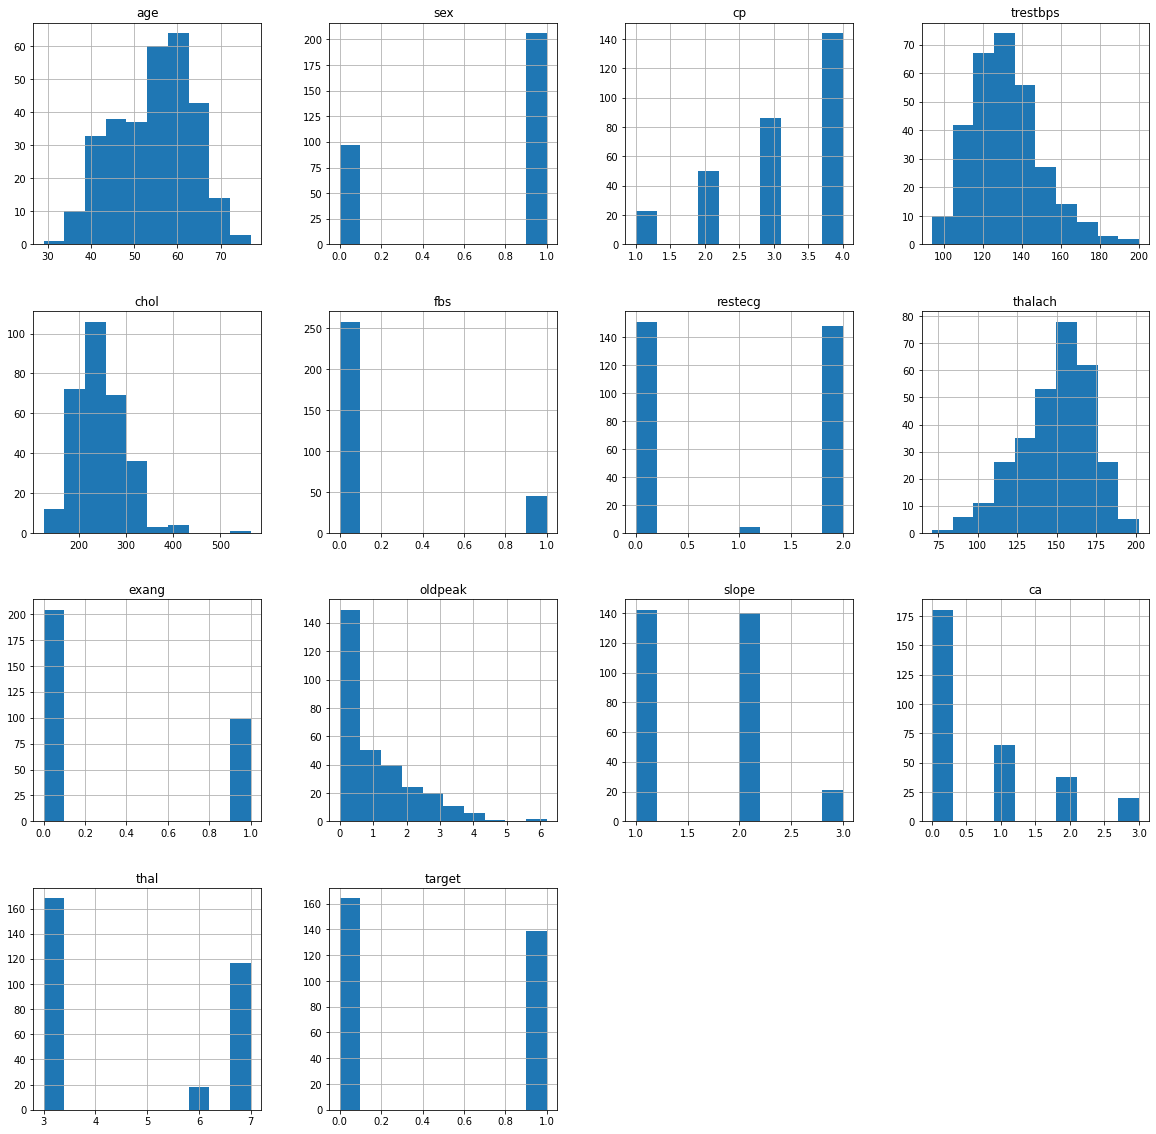

In [14]:
df.hist(figsize=(20,20))
plt.savefig('featuresplot')

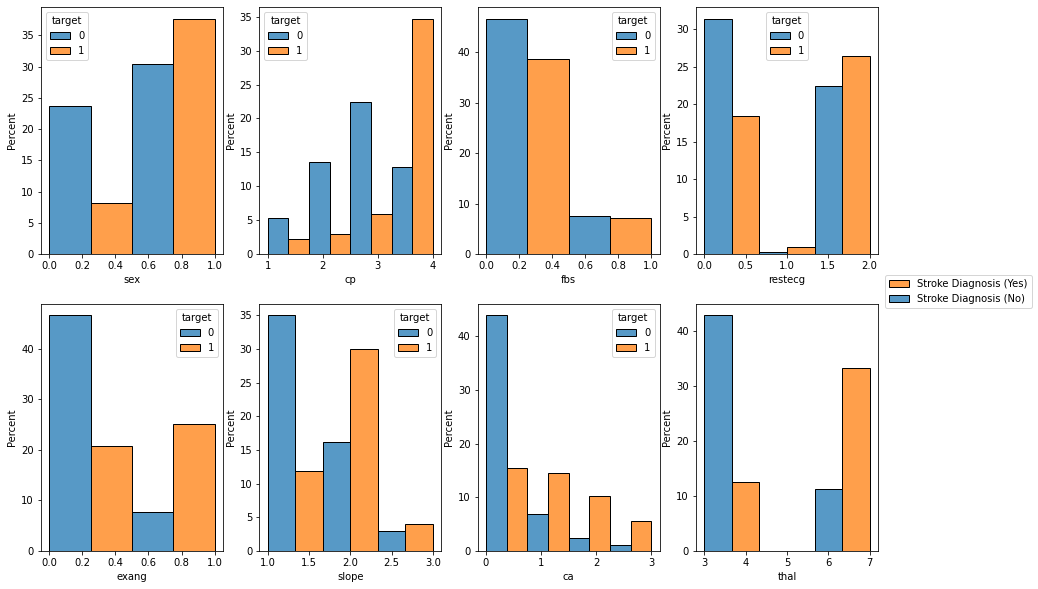

In [15]:
fig, axis = plt.subplots(nrows=2,ncols=4,figsize=(15,10))
sns.histplot(data=df, x='sex', hue='target', multiple='dodge',bins=2,stat='percent',ax=axis[0,0])
sns.histplot(data=df, x='cp', hue='target', multiple='dodge',bins=4,stat='percent',ax=axis[0,1])
sns.histplot(data=df, x='fbs', hue='target', multiple='dodge',bins=2,stat='percent',ax=axis[0,2])
sns.histplot(data=df, x='restecg', hue='target', multiple='dodge',bins=3,stat='percent',ax=axis[0,3])
sns.histplot(data=df, x='exang', hue='target', multiple='dodge',bins=2,stat='percent',ax=axis[1,0])
sns.histplot(data=df, x='slope', hue='target', multiple='dodge',bins=3,stat='percent',ax=axis[1,1])
sns.histplot(data=df, x='ca', hue='target', multiple='dodge',bins=4,stat='percent',ax=axis[1,2])
sns.histplot(data=df, x='thal', hue='target', multiple='dodge',bins=3,stat='percent',ax=axis[1,3])
plt.legend(labels=["Stroke Diagnosis (Yes)","Stroke Diagnosis (No)"],bbox_to_anchor=(1.04, 1.05), loc="center left", borderaxespad=0)

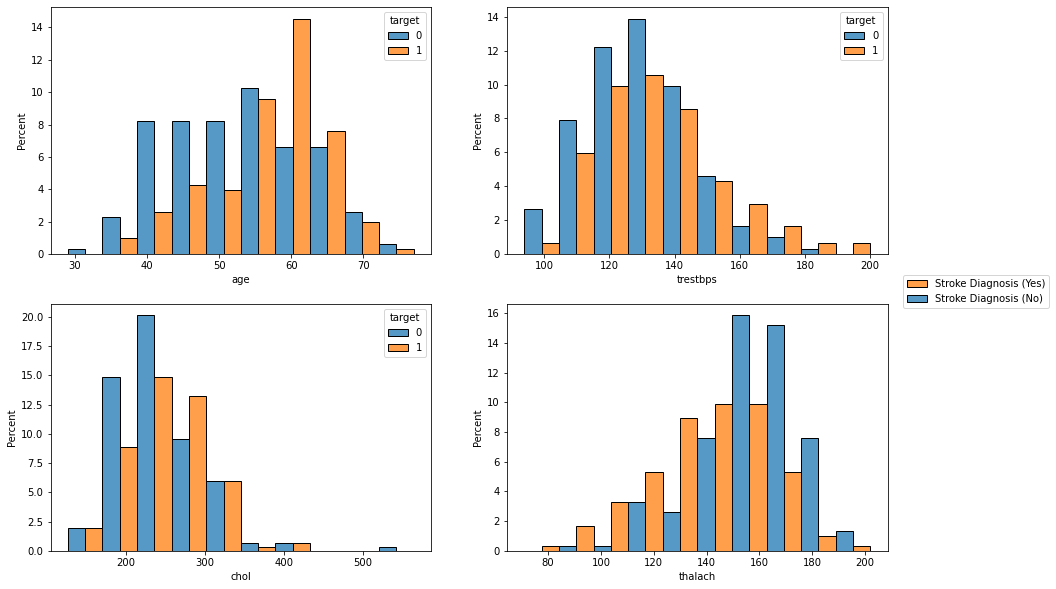

In [16]:
fig, axis = plt.subplots(nrows=2,ncols=2,figsize=(15,10))
sns.histplot(data=df, x='age', hue='target', multiple='dodge',bins=10,stat='percent',ax=axis[0,0])
sns.histplot(data=df, x='trestbps', hue='target', multiple='dodge',bins=10,stat='percent',ax=axis[0,1])
sns.histplot(data=df, x='chol', hue='target', multiple='dodge',bins=10,stat='percent',ax=axis[1,0])
plt.legend(labels=["Stroke Diagnosis (No)","Stroke Diagnosis (Yes)"])
sns.histplot(data=df, x='thalach', hue='target', multiple='dodge',bins=10,stat='percent',ax=axis[1,1])
plt.legend(labels=["Stroke Diagnosis (No)","Stroke Diagnosis (Yes)"])
plt.legend(labels=["Stroke Diagnosis (Yes)","Stroke Diagnosis (No)"],bbox_to_anchor=(1.04, 1.05), loc="center left", borderaxespad=0)

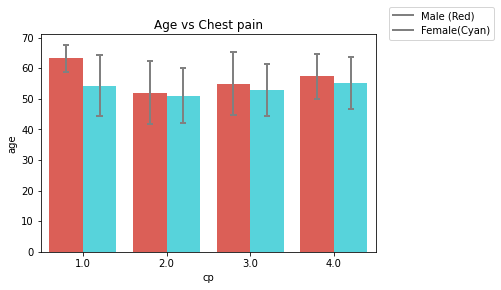

In [17]:
bar_plt=sns.barplot(x = 'cp', y = 'age', hue = 'sex', data = df,
            palette = 'hls', 
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'  
            )
bar_plt.set(title = "Age vs Chest pain")
plt.legend(labels=["Male (Red)","Female(Cyan)"],bbox_to_anchor=(1.04, 1.05), loc="center left", borderaxespad=0)
plt.show()

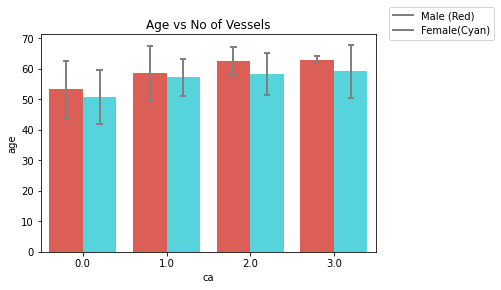

In [18]:
bar_plt=sns.barplot(x = 'ca', y = 'age', hue = 'sex', data = df,
            palette = 'hls', 
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )
bar_plt.set(title = "Age vs No of Vessels")
plt.legend(labels=["Male (Red)","Female(Cyan)"],bbox_to_anchor=(1.04, 1.05), loc="center left", borderaxespad=0)
plt.show()

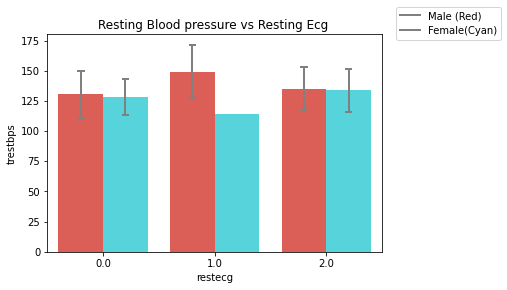

In [19]:

bar_plt=sns.barplot(x = 'restecg', y = 'trestbps', hue = 'sex', data = df,
            palette = 'hls', 
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )
bar_plt.set(title = "Resting Blood pressure vs Resting Ecg ")
plt.legend(labels=["Male (Red)","Female(Cyan)"],bbox_to_anchor=(1.04, 1.05), loc="center left", borderaxespad=0)
plt.show()

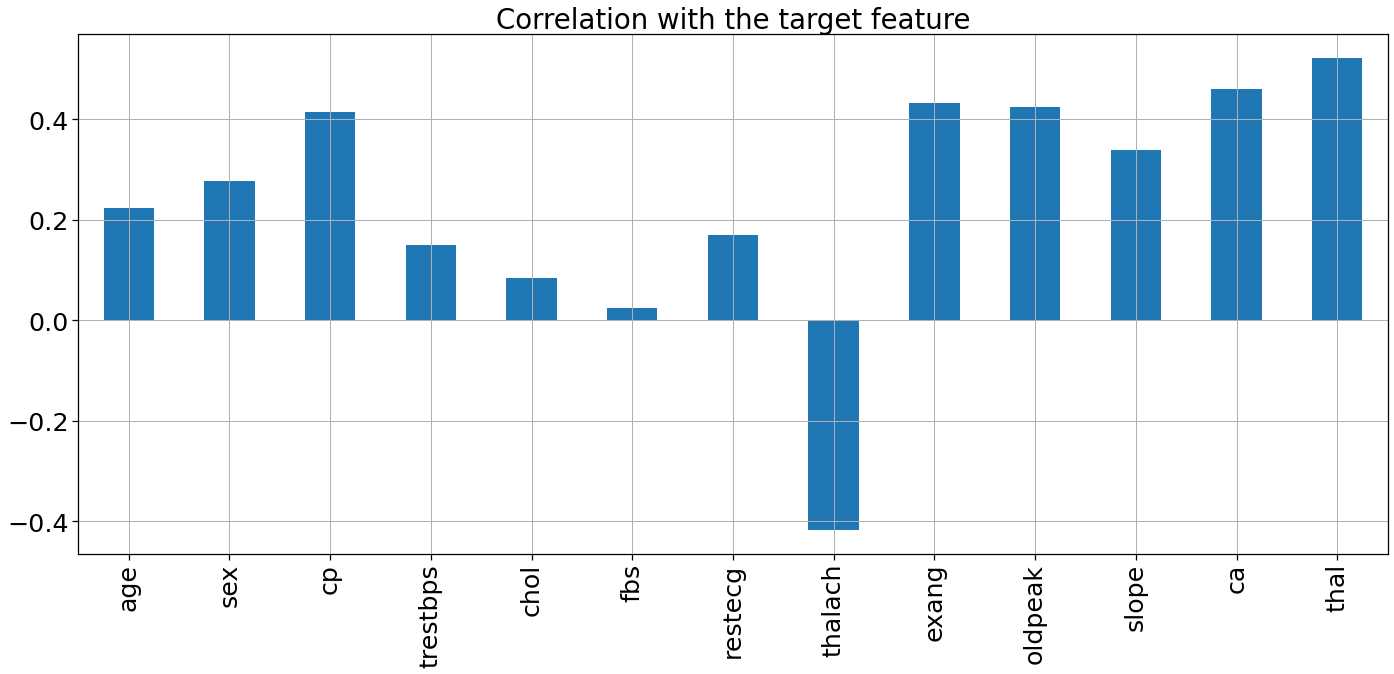

In [20]:
sns.set_context('notebook',font_scale = 2.3)
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(20, 10), 
                    title="Correlation with the target feature")
plt.tight_layout()

In [38]:
# Feature selection method 1
X= df.drop(columns=["target"])
y= df['target']
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
uni = SelectKBest(score_func = f_classif, k = 5)
fit = uni.fit(X, y)
X.columns[fit.get_support(indices=True)].tolist()

['thalach', 'exang', 'oldpeak', 'ca', 'thal']

In [34]:
# Feature Selection based on correlation
cor = df.corr()
cor_target = abs(cor["target"])
relevant_features = cor_target[cor_target > 0.2]
print(relevant_features)
relevant_features.index

age        0.223120
sex        0.276816
cp         0.414446
thalach    0.417167
exang      0.431894
oldpeak    0.424510
slope      0.339213
ca         0.460033
thal       0.522057
target     1.000000
Name: target, dtype: float64


Index(['age', 'sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca',
       'thal', 'target'],
      dtype='object')

Text(0, 0.5, 'Maximum Blood Pressure Achieved')

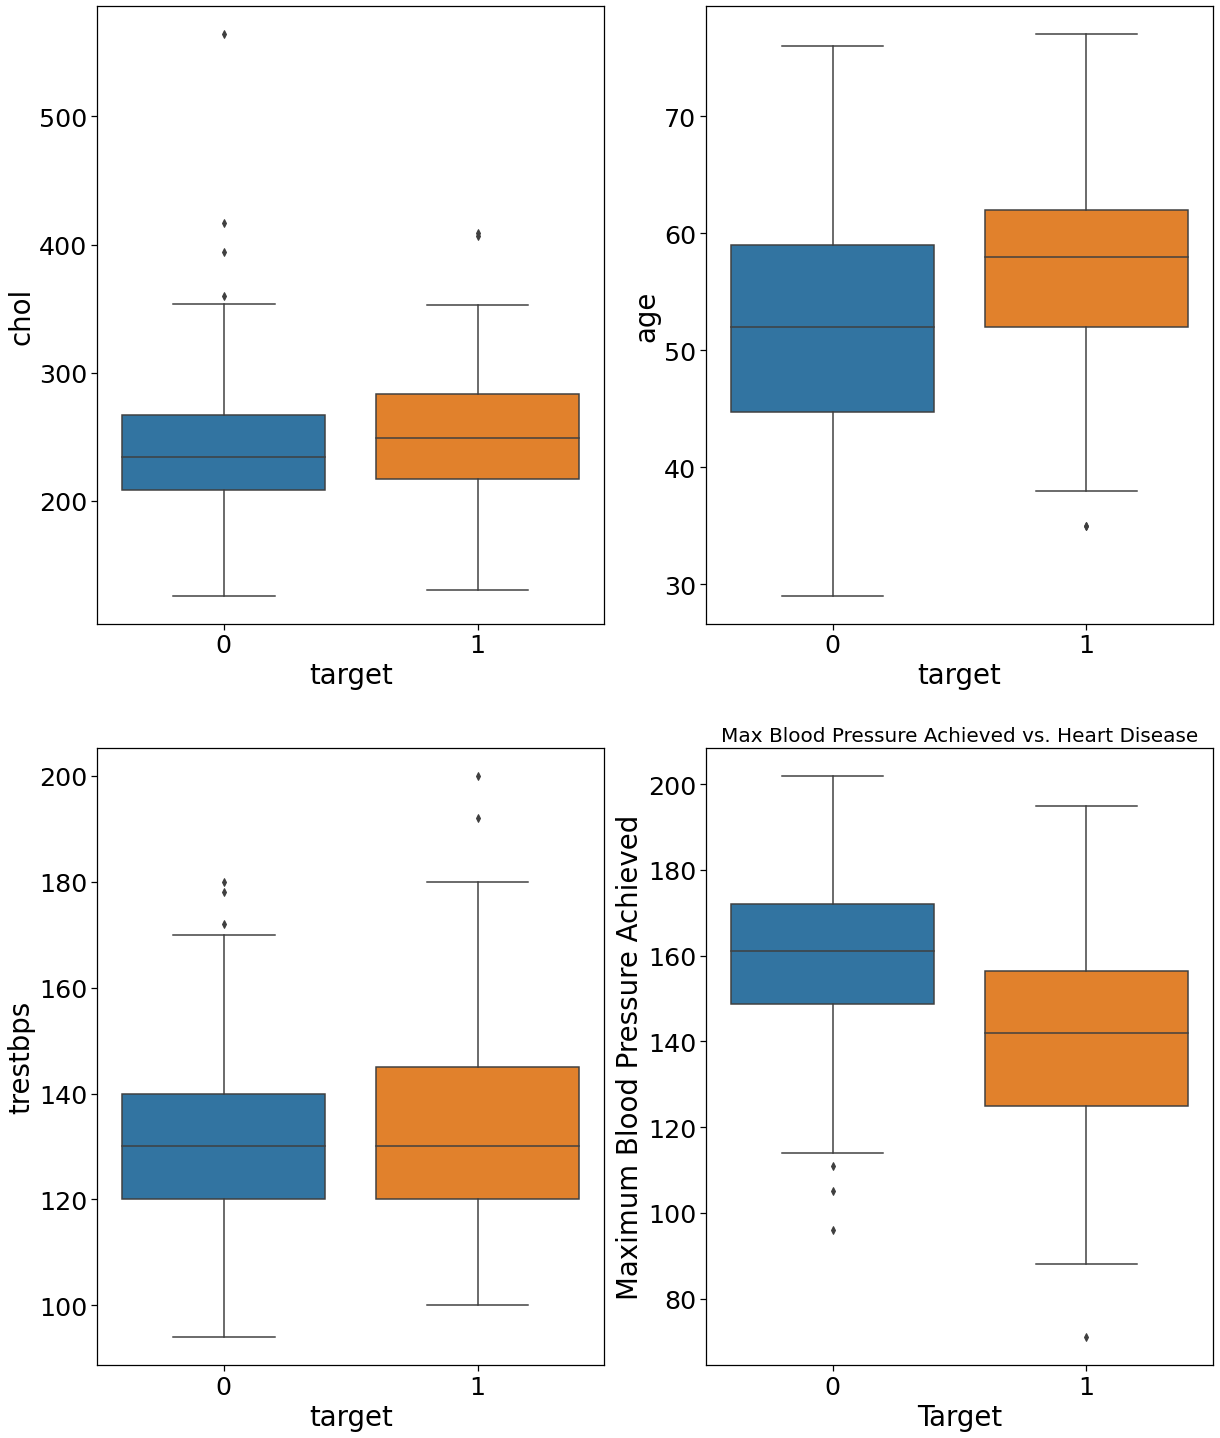

In [21]:
# boxplot to see outliers
fig, axis = plt.subplots(nrows=2,ncols=2,figsize=(20,25))
sns.boxplot(x= df["target"], y= df["chol"], ax=axis[0,0])
plt.title("Cholestrol vs. Heart Disease Target", fontsize=20)
plt.xlabel("Target")
plt.ylabel("Cholestrol")

sns.boxplot(x= df["target"], y= df["age"], ax=axis[0,1])
plt.title("Age vs. Heart Disease Target", fontsize=20)
plt.xlabel("Target")
plt.ylabel("Age")

sns.boxplot(x= df["target"], y= df["trestbps"], ax=axis[1,0])
plt.title("Resting Blood Pressure vs. Heart Disease Target", fontsize=20)
plt.xlabel("Target")
plt.ylabel("Resting Blood Pressure")

sns.boxplot(x= df["target"], y= df["thalach"], ax=axis[1,1])
plt.title("Max Blood Pressure Achieved vs. Heart Disease", fontsize=20)
plt.xlabel("Target")
plt.ylabel("Maximum Blood Pressure Achieved")

Text(0, 0.5, 'Age')

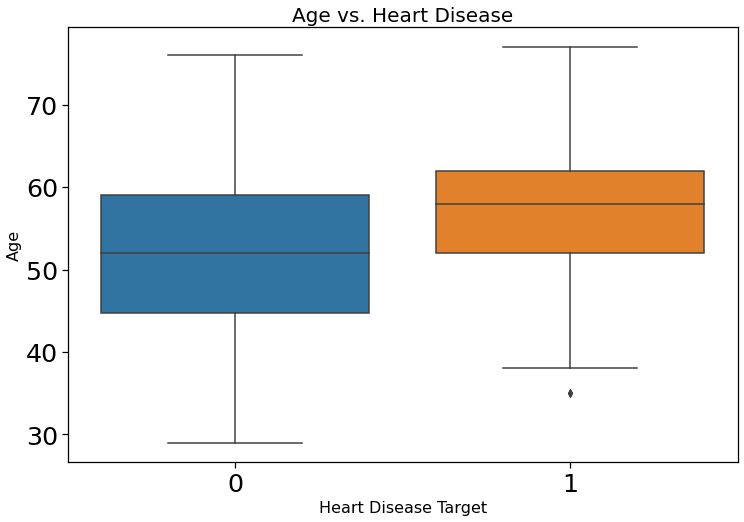

In [23]:
plt.figure(figsize=(12,8))
sns.boxplot(x= df["target"], y= df["age"])
plt.title("Age vs. Heart Disease", fontsize=20)
plt.xlabel("Heart Disease Target",fontsize=16)
plt.ylabel("Age", fontsize=16)

Text(0, 0.5, 'Cholestrol')

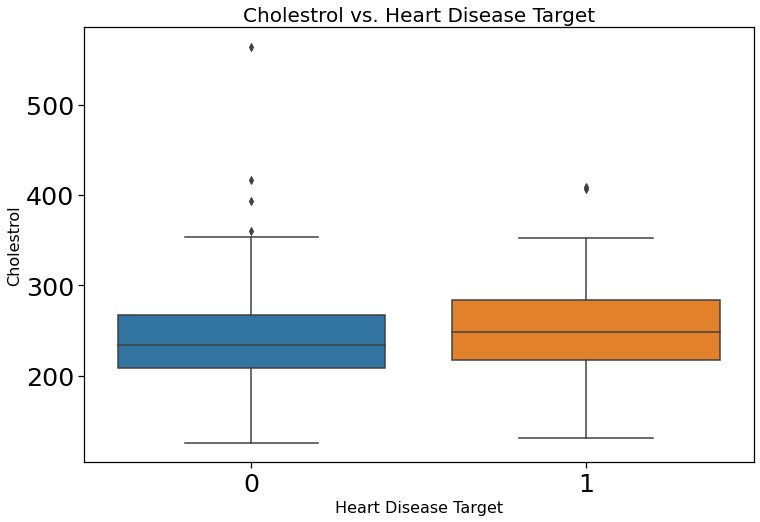

In [24]:
plt.figure(figsize=(12,8))
sns.boxplot(x= df["target"], y= df["chol"])
plt.title("Cholestrol vs. Heart Disease Target", fontsize=20)
plt.xlabel("Heart Disease Target",fontsize=16)
plt.ylabel("Cholestrol", fontsize=16)

In [25]:
x = df.drop('target', axis=1)
y = df.target
# splitting of data
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=40)
# standardize data
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform (x_test)

In [27]:
# Method1: Logistic Regression

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1.0, max_iter=100)
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
cm=confusion_matrix(y_test,pred_lr)

print(classification_report(y_test, pred_lr))
cm

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        42
           1       0.90      0.82      0.86        34

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



array([[39,  3],
       [ 6, 28]], dtype=int64)

In [28]:
# Method 2: Decision Tree 

from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5)
dt.fit(x_train, y_train)
pred_dt=dt.predict(x_test)
cm= confusion_matrix(y_test,pred_dt)

print(classification_report(y_test, pred_dt))
cm

              precision    recall  f1-score   support

           0       0.74      0.76      0.75        42
           1       0.70      0.68      0.69        34

    accuracy                           0.72        76
   macro avg       0.72      0.72      0.72        76
weighted avg       0.72      0.72      0.72        76



array([[32, 10],
       [11, 23]], dtype=int64)

In [29]:
# Method 3: Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=8,min_samples_split=5)
rfc.fit(x_train, y_train)
pred_rfc= rfc.predict(x_test)
cm3=confusion_matrix(y_test, pred_rfc)

print(classification_report(y_test, pred_rfc))
cm3

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        42
           1       0.82      0.82      0.82        34

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



array([[36,  6],
       [ 6, 28]], dtype=int64)

In [30]:
# Model 4 KNN

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
cm4= confusion_matrix(y_test,pred_knn)
print(classification_report(y_test,pred_knn))
cm4

              precision    recall  f1-score   support

           0       0.83      0.93      0.88        42
           1       0.90      0.76      0.83        34

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.85        76



array([[39,  3],
       [ 8, 26]], dtype=int64)

In [31]:
# Method 5: Naive Bayes Classifier
    
nbc = GaussianNB()
nbc.fit(x_train, y_train)
pred_nbc= nbc.predict(x_test)
cm5 = confusion_matrix(y_test,pred_nbc)
print(classification_report(y_test, pred_nbc))
cm5

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        42
           1       0.88      0.85      0.87        34

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



array([[38,  4],
       [ 5, 29]], dtype=int64)

In [32]:
#  Predicting with the model#5

xnew= [[67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0]]
xnew = sc.transform(xnew)
ynew = nbc.predict(xnew)
if (ynew==0):
    print("Heart Attack Risk Low")
else:
    print("Heart Attack Risk High")

Heart Attack Risk High


C:\Users\mehed\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
